### Filter By Boro

In [3]:
import pandas as pd
df = pd.read_csv('data/data.csv')
df = df[df.BORO_NM=="MANHATTAN"]
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/data.csv'

### Issue 1 - Interesting Crime 

In [20]:
df = pd.read_csv('data/data.csv')
df = df[df.OFNS_DESC=="FORGERY"]
df.sort_values("PREM_TYP_DESC")
df

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
43,283046394,1,MANHATTAN,01/01/2024,12:00:00,03/01/2024,14:49:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,982380.0,197844.0,40.709715,-74.006744,"(40.709715, -74.006744)",POINT (-74.006744 40.709715)
140,279794668,18,MANHATTAN,01/01/2024,22:10:00,01/01/2024,22:15:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,988669.0,216684.0,40.761423,-73.984048,"(40.7614228372042, -73.9840483917395)",POINT (-73.9840483917395 40.7614228372042)
306,283795860,79,BROOKLYN,01/01/2024,00:00:00,03/14/2024,18:30:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,998477.0,191688.0,40.692805,-73.948695,"(40.692805, -73.948695)",POINT (-73.948695 40.692805)
378,279789943,81,BROOKLYN,01/01/2024,16:47:00,01/01/2024,17:06:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1004919.0,187068.0,40.680111,-73.925480,"(40.680111039841414, -73.92548046570226)",POINT (-73.92548046570226 40.680111039841414)
564,279786364,41,BRONX,01/01/2024,16:27:00,01/01/2024,16:35:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1014249.0,238403.0,40.820986,-73.891613,"(40.82098580550746, -73.8916133211247)",POINT (-73.8916133211247 40.82098580550746)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133509,284584352,13,MANHATTAN,03/31/2024,17:43:00,03/31/2024,18:04:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,988276.0,210451.0,40.744317,-73.985470,"(40.744317, -73.98547)",POINT (-73.98547 40.744317)
133658,284588498,24,MANHATTAN,03/31/2024,21:55:00,03/31/2024,22:00:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,995643.0,230619.0,40.799665,-73.958848,"(40.799665, -73.958848)",POINT (-73.958848 40.799665)
133778,286387410,63,BROOKLYN,03/31/2024,12:00:00,04/04/2024,12:00:00,COMPLETED,(null),NaN,...,NaN,65+,WHITE,F,1011447.0,162943.0,40.613877,-73.902040,"(40.613877, -73.90204)",POINT (-73.90204 40.613877)
134374,284562245,103,QUEENS,03/31/2024,02:20:00,03/31/2024,02:27:00,COMPLETED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,E,1037244.0,195024.0,40.701814,-73.808874,"(40.70181387328086, -73.80887433026759)",POINT (-73.80887433026759 40.70181387328086)


<br>### Issue 2 - Join Crimes and Arrests<br>

In [2]:
import pandas as pd
df_1 = pd.read_csv('data/arrests.csv')
df_1.columns

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [3]:
df_2 = pd.read_csv('data/crimes.csv')
df_2.columns
df_2.head(5)

,Unnamed: 0,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,51870,282411683,60,BROOKLYN,02/18/2024,12:10:00,02/18/2024,12:18:00,COMPLETED,(null),...,NaN,UNKNOWN,UNKNOWN,E,990148.0,155255.0,40.592813,-73.978763,"(40.592813307614215, -73.97876328945328)",POINT (-73.97876328945328 40.592813307614215)
1,116441,279933201,18,MANHATTAN,01/04/2024,00:15:00,01/04/2024,00:25:00,COMPLETED,(null),...,NaN,25-44,WHITE,F,988757.0,216332.0,40.760457,-73.983731,"(40.76045664314996, -73.98373096728758)",POINT (-73.98373096728758 40.76045664314996)
2,23539,281846733,20,MANHATTAN,09/07/2023,23:35:00,12/01/2023,12:00:00,COMPLETED,(null),...,NaN,65+,WHITE,M,989200.0,222851.0,40.778351,-73.982126,"(40.778351, -73.982126)",POINT (-73.982126 40.778351)
3,188022,281559921,75,BROOKLYN,01/30/2024,15:50:00,01/30/2024,15:56:00,COMPLETED,(null),...,NaN,25-44,BLACK HISPANIC,M,1016845.0,182111.0,40.666469,-73.882507,"(40.666469319202875, -73.8825067547414)",POINT (-73.8825067547414 40.666469319202875)
4,193201,286123283,50,BRONX,04/29/2024,01:00:00,04/30/2024,11:15:00,COMPLETED,(null),...,NaN,25-44,WHITE HISPANIC,F,1011088.0,271303.0,40.911299,-73.902901,"(40.911299, -73.902901)",POINT (-73.902901 40.911299)


In [4]:
df_1[['PD_CD','PD_DESC', 'KY_CD', 'OFNS_DESC','LAW_CODE', 'LAW_CAT_CD']]

,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD
0,153.0,RAPE 3,104.0,RAPE,PL 1302503,F
1,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F
2,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1201001,F
3,203.0,"TRESPASS 3, CRIMINAL",352.0,CRIMINAL TRESPASS,PL 140100A,M
4,223.0,"BURGLARY,RESIDENCE,NIGHT",107.0,BURGLARY,PL 1403002,F
...,...,...,...,...,...,...
128773,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M
128774,779.0,"PUBLIC ADMINISTRATION,UNCLASSI",126.0,MISCELLANEOUS PENAL LAW,PL 215510D,F
128775,511.0,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M
128776,510.0,"CONTROLLED SUBSTANCE, INTENT T",117.0,DANGEROUS DRUGS,PL 2200601,F


In [5]:
df_2[['KY_CD','LAW_CAT_CD','PD_DESC','OFNS_DESC']]

,KY_CD,LAW_CAT_CD,PD_DESC,OFNS_DESC
0,235,MISDEMEANOR,"CONTROLLED SUBSTANCE, POSSESSI",DANGEROUS DRUGS
1,344,MISDEMEANOR,ASSAULT 3,ASSAULT 3 & RELATED OFFENSES
2,109,FELONY,"LARCENY,GRAND FROM OPEN AREAS, UNATTENDED",GRAND LARCENY
3,348,MISDEMEANOR,LEAVING SCENE-ACCIDENT-PERSONA,VEHICLE AND TRAFFIC LAWS
4,109,FELONY,"LARCENY,GRAND OF VEHICULAR/MOTORCYCLE ACCESSORIES",GRAND LARCENY
...,...,...,...,...
124995,121,FELONY,"MISCHIEF,CRIMINAL, UNCL 2ND",CRIMINAL MISCHIEF & RELATED OF
124996,121,FELONY,"MISCHIEF, CRIMINAL 3 & 2, OF M",CRIMINAL MISCHIEF & RELATED OF
124997,359,MISDEMEANOR,"CONTEMPT,CRIMINAL",OFFENSES AGAINST PUBLIC ADMINI
124998,110,FELONY,"LARCENY,GRAND OF AUTO",GRAND LARCENY OF MOTOR VEHICLE


In [6]:
print(df_1['KY_CD'].dtype)
print(df_2['KY_CD'].dtype)

float64
int64


In [7]:
df_2['KY_CD'] = df_2['KY_CD'].astype(float)

In [8]:
df_1_subset = df_1[['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC','LAW_CODE', 'ARREST_BORO', 'ARREST_PRECINCT','JURISDICTION_CODE']]

In [9]:
df_2_subset = df_2[['CMPLNT_NUM', 'ADDR_PCT_CD', 'BORO_NM','JURISDICTION_CODE', 'JURIS_DESC', 'KY_CD','PD_CD', 'PD_DESC']]

In [10]:
df_subset_mg = df_1_subset.merge(df_2_subset, on=['PD_CD','KY_CD'], how='left', suffixes=('_arrest','_crime'))

In [11]:
print(df_subset_mg.head(10))

   ARREST_KEY ARREST_DATE  PD_CD PD_DESC_arrest  KY_CD OFNS_DESC    LAW_CODE  \
0   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
1   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
2   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
3   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
4   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
5   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
6   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
7   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
8   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   
9   279884335  01/03/2024  153.0         RAPE 3  104.0      RAPE  PL 1302503   

  ARREST_BORO  ARREST_PRECINCT  JURISDICTION_CODE_arrest CMPLNT_NUM  \
0           K               77                  

### Issue 3 - NBA Games <br>

In [50]:
import pandas as pd
import sqlite3

con = sqlite3.connect("/Users/kyueunkim/Documents/GitHub/UMD-INST627-Fall2024/data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game LIMIT 100", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [12]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [7]:
games.head(5)

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,0024600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,None,None,None,None,None,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,0024600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,None,None,None,None,None,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,0024600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,None,None,None,None,None,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,0024600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,None,None,None,None,None,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,0024600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,None,None,None,None,None,NaN,50.0,17,0,Regular Season


In [8]:
active_players.head(5)

,full_name
0,Precious Achiuwa
1,Steven Adams
2,Bam Adebayo
3,Ochai Agbaji
4,Santi Aldama


In [14]:
games_recent = pd.read_sql_query("""
    SELECT season_id, season_type, team_name_home, game_Date
    FROM game
    ORDER BY season_id DESC"""
    , con)
games_recent.head(100) 

# Selected Team: Boston Celtics

,season_id,season_type,team_name_home,game_date
0,42022,Playoffs,Sacramento Kings,2023-04-15 00:00:00
1,42022,Playoffs,Boston Celtics,2023-04-15 00:00:00
2,42022,Playoffs,Cleveland Cavaliers,2023-04-15 00:00:00
3,42022,Playoffs,Philadelphia 76ers,2023-04-15 00:00:00
4,42022,Playoffs,Milwaukee Bucks,2023-04-16 00:00:00
...,...,...,...,...
95,42021,Playoffs,Phoenix Suns,2022-04-19 00:00:00
96,42021,Playoffs,Memphis Grizzlies,2022-04-19 00:00:00
97,42021,Playoffs,Miami Heat,2022-04-19 00:00:00
98,42021,Playoffs,Milwaukee Bucks,2022-04-20 00:00:00


In [ ]:
games_sliced = games.iloc[:,8:28]
games_sliced.head(5)

# Selected columns for calculating average score: pts_home, pts_away

In [31]:
games_bc_avg = pd.read_sql_query("""
    SELECT team_name_home, avg(pts_home) AS home_avg, avg(pts_away) AS away_avg
    FROM game
    WHERE team_name_home = 'Boston Celtics'
    """, con)
print(games_bc_avg)

   team_name_home    home_avg    away_avg
0  Boston Celtics  106.278489  100.226633


### Issue 4 - Analytical Questions <br>

#### Business Objective
Which team would be the best to invest in for the upcoming season?

#### Analytical Questions
1. Which teams have most consistently had the highest scores?
2. Which team has had below average for the most consecutive seasons?
3. Which team has consistently made it to the playoffs?
4. Which teams have shown the greatest improvement over the past five years?
5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

### Issue 5 - Descripitive Statistics
### Issue 6 - Storyboard <br>

In [1]:
import pandas as pd
import sqlite3

con = sqlite3.connect("/Users/kyueunkim/Documents/GitHub/UMD-INST627-Fall2024/data/nba.sqlite")
games = pd.read_sql_query("SELECT * FROM game", con)
active_players = pd.read_sql_query("SELECT full_name FROM player WHERE is_active=TRUE", con)

In [2]:
games.columns

Index(['season_id', 'team_id_home', 'team_abbreviation_home', 'team_name_home',
       'game_id', 'game_date', 'matchup_home', 'wl_home', 'min', 'fgm_home',
       'fga_home', 'fg_pct_home', 'fg3m_home', 'fg3a_home', 'fg3_pct_home',
       'ftm_home', 'fta_home', 'ft_pct_home', 'oreb_home', 'dreb_home',
       'reb_home', 'ast_home', 'stl_home', 'blk_home', 'tov_home', 'pf_home',
       'pts_home', 'plus_minus_home', 'video_available_home', 'team_id_away',
       'team_abbreviation_away', 'team_name_away', 'matchup_away', 'wl_away',
       'fgm_away', 'fga_away', 'fg_pct_away', 'fg3m_away', 'fg3a_away',
       'fg3_pct_away', 'ftm_away', 'fta_away', 'ft_pct_away', 'oreb_away',
       'dreb_away', 'reb_away', 'ast_away', 'stl_away', 'blk_away', 'tov_away',
       'pf_away', 'pts_away', 'plus_minus_away', 'video_available_away',
       'season_type'],
      dtype='object')

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Which teams have most consistently had the highest scores?

Introduction
- Who's the most powerful team in the NBA? Is scoring lots of points all that matters?
- Let's look at NBA game data from 2019 to 2023 to find out what makes a truly dominant team.

In [77]:
# games data excluding all-star games (2019-2023)

games_recent_5yrs = pd.read_sql_query("""
	SELECT * FROM game 
	WHERE season_type NOT IN ('All Star', 'All-Star') 
	AND game_date BETWEEN '2019-01-01 00:00:00' AND '2023-12-31 23:59:59'
    ORDER BY game_date DESC
""", con)

print(games_recent_5yrs.head(5))

  season_id team_id_home team_abbreviation_home  team_name_home     game_id  \
0     42022   1610612743                    DEN  Denver Nuggets  0042200405   
1     42022   1610612748                    MIA      Miami Heat  0042200404   
2     42022   1610612748                    MIA      Miami Heat  0042200403   
3     42022   1610612743                    DEN  Denver Nuggets  0042200402   
4     42022   1610612743                    DEN  Denver Nuggets  0042200401   

             game_date matchup_home wl_home  min  fgm_home  ...  reb_away  \
0  2023-06-12 00:00:00  DEN vs. MIA       W  240      38.0  ...      44.0   
1  2023-06-09 00:00:00  MIA vs. DEN       L  240      35.0  ...      34.0   
2  2023-06-07 00:00:00  MIA vs. DEN       L  240      34.0  ...      58.0   
3  2023-06-04 00:00:00  DEN vs. MIA       L  240      39.0  ...      31.0   
4  2023-06-01 00:00:00  DEN vs. MIA       W  240      40.0  ...      43.0   

   ast_away  stl_away  blk_away  tov_away  pf_away  pts_away  

In [43]:
# mean, standard deviation of scores for each team
score_stats_home = games_recent_5yrs.groupby(['team_id_home','team_name_home'])['pts_home'].agg(['mean', 'std', 'count'])
score_stats_away = games_recent_5yrs.groupby(['team_id_away','team_name_away'])['pts_away'].agg(['mean', 'std', 'count'])

score_stats_home.index.names = ['team_id', 'team_name']
score_stats_away.index.names = ['team_id', 'team_name']

combined_stats = pd.concat([score_stats_home, score_stats_away])
score_stats_all = combined_stats.groupby(['team_id', 'team_name']).mean()
score_stats_all['total_games'] = combined_stats.groupby(['team_id', 'team_name'])['count'].sum()
score_stats_all = score_stats_all[score_stats_all['total_games'] >= 100]

In [44]:
# teams with highest average
print("Teams with highest average scores:")
print(score_stats_all.sort_values(by='mean', ascending=False).head(25))

Teams with highest average scores:
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612749 Milwaukee Bucks         116.435716  12.726194  217.0          434
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612737 Atlanta Hawks           114.082051  12.425118  195.0          390
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612758 Sacramento Kings        113.760321  12.404773  186.5          373
1610612744 Golden State Warriors   113.553368  12.502250  207.5          415
1610612751 Brooklyn Nets           113.466575  12.269783  195.5          391
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612763 Memphis Grizzlies       113.219401  12.564816  196.5          393
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612743 Denver Nuggets          112.98

Rising Action
- At first glance, the Milwaukee Bucks seemed unbeatable, scoring a 116.44 points per game. 
- But we found something interesting. The top 10 teams were all scoring more than 113 points per game, with teams like the Utah Jazz and Minnesota Timberwolves close behind.

In [46]:
# teams with consistent scoring
print("Most consistent scoring teams (lowest standard deviation):")
print(score_stats_all.sort_values(by='std').head(25))

Most consistent scoring teams (lowest standard deviation):
                                         mean        std  count  total_games
team_id    team_name                                                        
1610612762 Utah Jazz               114.124126  11.353901  196.5          393
1610612739 Cleveland Cavaliers     107.244895  11.354891  182.0          364
1610612740 New Orleans Pelicans    113.429579  11.357125  184.5          369
1610612756 Phoenix Suns            113.174049  11.591735  205.5          411
1610612748 Miami Heat              108.997146  11.596273  217.5          435
1610612761 Toronto Raptors         111.561036  11.654833  203.0          406
1610612743 Denver Nuggets          112.986301  11.774490  219.0          438
1610612753 Orlando Magic           107.049138  11.822853  189.0          378
1610612750 Minnesota Timberwolves  114.046378  11.995903  184.0          368
1610612765 Detroit Pistons         106.855801  11.997323  183.0          366
1610612747 Los An

Climax
- When we looked at how consistent these teams were at scoring (using standard deviation), the Utah Jazz stood out.
- They not only scored a lot of points (114 per game) but did it more consistently than any other team. They seem to achieve both high scoring AND reliability.

Falling Action
- This discovery showed us that being the best isn't just about scoring the most points. It's about being able to perform well game after game. While the Bucks were scoring more, the Jazz were more dependable.

Resolution
- In the end, the Utah Jazz emerged as the most impressive team.
- The Milwaukee Bucks and Minnesota Timberwolves were great too, but the Utah Jazz showed remarkable high scoring and consistency that makes a truly promising team.

In [58]:
score_LeBron = games[games['team_name_home']=='Team LeBron']
print(score_LeBron.head(10))

      season_id team_id_home team_abbreviation_home team_name_home  \
64311     32021   1610616834                    LBN    Team LeBron   
65696     32022   1610616834                    LBN    Team LeBron   
65697     32022   1610616834                    LBN    Team LeBron   

          game_id            game_date matchup_home wl_home  min  fgm_home  \
64311  0032100001  2022-02-20 00:00:00  LBN vs. DRT       W  240      67.0   
65696  0032200001  2023-02-19 00:00:00  LBN vs. GNS       L  221      79.0   
65697  0032200001  2023-02-19 00:00:00  LBN vs. GNS       L  221      79.0   

       ...  reb_away  ast_away  stl_away  blk_away  tov_away  pf_away  \
64311  ...      50.0      41.0      11.0       1.0      14.0      2.0   
65696  ...      46.0      43.0       8.0       1.0      12.0      2.0   
65697  ...      46.0      43.0       8.0       1.0      12.0      2.0   

       pts_away  plus_minus_away  video_available_away  season_type  
64311     160.0               -3           

#### 2. Which team has had below average for the most consecutive seasons?

Introduction
- In NBA, scoring ability is often seen as a key indicator of a team's success.
- But what happens when teams consistently struggle to keep up with the league's scoring pace?
- Looking across all types of games - preseason, regular season, and playoffs - we investigated which teams have consistently struggled to keep up with the league's scoring average.

In [56]:
# average points per season
season_avg = pd.concat([games_recent_5yrs['pts_home'], games_recent_5yrs['pts_away']]).mean()

home_games = games_recent_5yrs[['season_id', 'team_id_home', 'team_name_home', 'pts_home']].rename(columns={
    'team_id_home': 'team_id',
    'team_name_home': 'team_name',
    'pts_home': 'points'
})
away_games = games_recent_5yrs[['season_id', 'team_id_away', 'team_name_away', 'pts_away']].rename(columns={
    'team_id_away': 'team_id',
    'team_name_away': 'team_name',
    'pts_away': 'points'
})
all_games = pd.concat([home_games, away_games])

# average points per team per season
team_season_avg = all_games.groupby(['season_id', 'team_id', 'team_name'])['points'].mean().reset_index()

# below average seasons
team_season_avg['league_avg'] = season_avg
team_season_avg['below_average'] = team_season_avg['points'] < team_season_avg['league_avg']
team_season_avg = team_season_avg.sort_values(['team_id', 'season_id'])
print(team_season_avg.head(10))

    season_id     team_id       team_name      points  league_avg  \
60      12022       15019  Adelaide 36ers  116.000000  111.924325   
0       12020  1610612737   Atlanta Hawks  112.750000  111.924325   
30      12021  1610612737   Atlanta Hawks  103.250000  111.924325   
61      12022  1610612737   Atlanta Hawks  112.750000  111.924325   
92      22018  1610612737   Atlanta Hawks  116.391304  111.924325   
122     22019  1610612737   Atlanta Hawks  111.761194  111.924325   
152     22020  1610612737   Atlanta Hawks  113.694444  111.924325   
182     22021  1610612737   Atlanta Hawks  113.939024  111.924325   
212     22022  1610612737   Atlanta Hawks  118.426829  111.924325   
274     42020  1610612737   Atlanta Hawks  106.277778  111.924325   

     below_average  
60           False  
0            False  
30            True  
61           False  
92           False  
122           True  
152          False  
182          False  
212          False  
274           True  


Rising Action
- Our initial analysis showed that the league's average scoring was 111.92 points per game across all games.
- We started tracking each team's performance relative to this benchmark, examining their scoring patterns season by season.
- Rather than just looking at single-game performances, we focused on identifying teams that consistently performed below this average.

In [55]:
# consecutive streaks
def consecutive_streak(group):
   current_streak = 0
   max_streak = 0
   
   for below_avg in group:
       if below_avg:
           current_streak += 1
           max_streak = max(max_streak, current_streak)
       else:
           current_streak = 0
           
   return max_streak

team_streaks = team_season_avg.groupby('team_name')['below_average'].apply(consecutive_streak)
team_streaks = team_streaks.sort_values(ascending=False)

print("Teams with most consecutive below-average seasons:")
print(team_streaks.head(10))

Teams with most consecutive below-average seasons:
team_name
Orlando Magic          9
Detroit Pistons        9
Miami Heat             7
Cleveland Cavaliers    7
Charlotte Hornets      5
Houston Rockets        5
San Antonio Spurs      4
Chicago Bulls          4
New York Knicks        4
Los Angeles Lakers     4
Name: below_average, dtype: int64


In [60]:
team_streaks = team_streaks.sort_values(ascending=True)

print("Teams with least consecutive below-average seasons:")
print(team_streaks.head(10))

Teams with least consecutive below-average seasons:
team_name
Adelaide 36ers               0
Ra'anana Maccabi Ra'anana    1
Golden State Warriors        1
New Orleans Pelicans         1
Sacramento Kings             1
Utah Jazz                    2
Boston Celtics               2
Brooklyn Nets                2
Dallas Mavericks             2
Phoenix Suns                 2
Name: below_average, dtype: int64


Climax
- Our analysis uncovered a striking pattern: the Orlando Magic and Detroit Pistons have particularly struggled, each recording 9 consecutive seasons below the league average. This wasn't a brief slump but a persistent challenge throughout recent five years.
- Following closely behind, Miami Heat and Cleveland Cavaliers each experienced 7 consecutive seasons below the league average.

Falling Action
- The pattern extends beyond just these teams. Charlotte Hornets and Houston Rockets showed 5 consecutive seasons below average, while several prestigious franchises including the San Antonio Spurs, Chicago Bulls, New York Knicks, and even Los Angeles Lakers all experienced 4-season streaks of below-average scoring.

Resolution
- While scoring performance shouldn't be the only factor in investment decisions, it serves as a crucial indicator of a team's current competitiveness and potential need for restructuring. 
- Teams like the Orlando Magic and Detroit Pistons, despite their 9-season streak below average scoring, might present unique investment opportunities if their valuations reflect these struggles. However, their persistent offensive challenges suggest any investment would need to be accompanied by significant strategic changes to their scoring approach.

#### 3. Which team has consistently made it to the playoffs? 

Introduction
- In the NBA, making it to the playoffs is a crucial indicator of a team's success.
- We analyzed playoff appearances from 2019 to 2023 to identify which teams have shown the most consistent postseason presence.

In [73]:
# playoff games
playoff_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Playoffs']

# playoff appearances (seasons)
playoff_home_seasons = playoff_games[['season_id', 'team_name_home']].rename(
   columns={'team_name_home': 'team_name'}).drop_duplicates()
playoff_away_seasons = playoff_games[['season_id', 'team_name_away']].rename(
   columns={'team_name_away': 'team_name'}).drop_duplicates()
all_playoff_seasons = pd.concat([playoff_home_seasons, playoff_away_seasons]).drop_duplicates()
playoff_appearances = all_playoff_seasons.groupby('team_name').size().sort_values(ascending=False)

# total playoff games (rounds)
playoff_home_games = playoff_games[['team_name_home', 'game_id']].rename(
   columns={'team_name_home': 'team_name'})
playoff_away_games = playoff_games[['team_name_away', 'game_id']].rename(
   columns={'team_name_away': 'team_name'})
all_playoff_games = pd.concat([playoff_home_games, playoff_away_games])
playoff_games_count = all_playoff_games.groupby('team_name').size()

# playoff appearances, for both seasons & games
playoff_all = pd.DataFrame({
    'team_name': playoff_appearances.index,
    'seasons': playoff_appearances.values,
    'total_games': playoff_games_count.values
})
    
# success rate
total_seasons = games_recent_5yrs['season_id'].nunique()
playoff_all['success_rate'] = (playoff_all['seasons'] / total_seasons * 100)

print("\nPlayoff appearances and games (2019-2023):")
print(playoff_all[['team_name', 'seasons', 'total_games', 'success_rate']])


Playoff appearances and games (2019-2023):
                 team_name  seasons  total_games  success_rate
0            Brooklyn Nets        5           29     38.461538
1           Denver Nuggets        5           75     38.461538
2       Philadelphia 76ers        5           29     38.461538
3          Milwaukee Bucks        5            5     38.461538
4           Boston Celtics        5            5     38.461538
5               Miami Heat        4           31     30.769231
6                Utah Jazz        4           68     30.769231
7              LA Clippers        4            4     30.769231
8        Memphis Grizzlies        3           57     23.076923
9          Toronto Raptors        3           23     23.076923
10  Portland Trail Blazers        3            8     23.076923
11            Phoenix Suns        3           43     23.076923
12           Atlanta Hawks        3           43     23.076923
13      Los Angeles Lakers        3           23     23.076923
14   Golden

Rising action
- Our analysis revealed interesting patterns.
- Five teams - the Brooklyn Nets, Denver Nuggets, Philadelphia 76ers, Milwaukee Bucks, and Boston Celtics - achieved a 100% playoff appearance rate, making it to the postseason in all five seasons.
-  However, mere appearances don't tell the whole story. We need to look at the total number of playoff games played to understand how deep these teams went in the playoffs.

Climax
- The Denver Nuggets emerged as the standout performer with 75 playoff games during this period, significantly more than most teams. This indicates not just consistent qualification but long playoff runs.
- Following closely, the Utah Jazz (68 games) and Golden State Warriors (66 games) showed impressive playoff runs despite not making it every season.

Falling Action
- On the opposite end, eight teams struggled with playoff consistency, making only one appearance in five years. These included established franchises like the Chicago Bulls (29 games) and Detroit Pistons (27 games).

Resolution
- From an investment perspective, the Denver Nuggets represent the most attractive opportunity, combining both consistent playoff appearances and deep postseason runs.
- Teams like the Warriors and Jazz, despite fewer appearances, demonstrate the ability to make deep playoff runs when they qualify, suggesting strong potential for postseason success.

#### 4. Which teams have shown the greatest improvement over the past five years?

Introduction
- We analyzed NBA teams' scoring performance from 2019-2023 to identify which teams have shown the most significant improvement in their offensive capabilities.
- Visualization: Line graph, league average scoring trend (2019-2023)

In [82]:
# extract year from game_date
games_recent_5yrs['game_year'] = pd.to_datetime(games_recent_5yrs['game_date']).dt.year

# limit to regular season
regular_games = games_recent_5yrs[games_recent_5yrs['season_type']=='Regular Season']

# home and away game data 
reg_home_games = regular_games[['team_name_home', 'game_year', 'pts_home']].rename(
    columns={'team_name_home': 'team_name', 'pts_home': 'points'})
reg_away_games = regular_games[['team_name_away', 'game_year', 'pts_away']].rename(
    columns={'team_name_away': 'team_name', 'pts_away': 'points'})
reg_all_games = pd.concat([reg_home_games, reg_away_games])

# average points for each team by year
team_year_avg = reg_all_games.groupby(['team_name', 'game_year'])['points'].mean().reset_index()

# improvement
improvement_list = []

for team in team_year_avg['team_name'].unique():
    team_data = team_year_avg[team_year_avg['team_name'] == team].sort_values('game_year')
    
    total_improvement = team_data['points'].diff().sum() 
    
    improvement_list.append({
        'team_name_home': team, 
        'total_improvement': total_improvement
    })

team_improvement = pd.DataFrame(improvement_list)
team_improvement = team_improvement.sort_values(by='total_improvement', ascending=False)

print("Teams with the greatest improvement over the past five years:")
print(team_improvement.head(20))

Teams with the greatest improvement over the past five years:
            team_name_home  total_improvement
19         New York Knicks          14.695726
25        Sacramento Kings          12.650000
14       Memphis Grizzlies          10.526330
0            Atlanta Hawks           9.028261
11          Indiana Pacers           8.326020
9    Golden State Warriors           7.655134
5      Cleveland Cavaliers           7.627350
13      Los Angeles Lakers           6.813824
20   Oklahoma City Thunder           6.298844
21           Orlando Magic           5.524613
7           Denver Nuggets           5.377463
4            Chicago Bulls           5.149422
1           Boston Celtics           4.875494
28               Utah Jazz           4.740310
22      Philadelphia 76ers           4.458629
6         Dallas Mavericks           4.343460
3        Charlotte Hornets           4.276423
17  Minnesota Timberwolves           4.053968
12             LA Clippers           2.143659
15              Mi

Rising action
- Looking at regular season games, we discovered interesting patterns in scoring development.
- Some traditionally lower-scoring teams began showing progress.

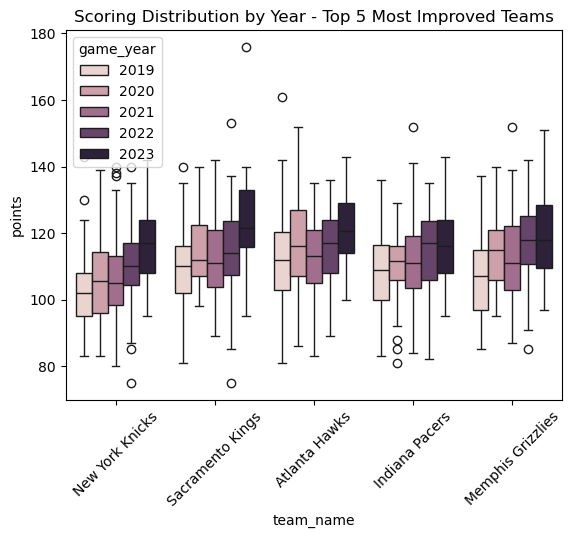

In [85]:
top_5_teams = team_improvement['team_name_home'].head().tolist()
top_5_data = reg_all_games[reg_all_games['team_name'].isin(top_5_teams)]
sns.boxplot(data=top_5_data, x='team_name', y='points', hue='game_year')
plt.title('Scoring Distribution by Year - Top 5 Most Improved Teams')
plt.xticks(rotation=45)
plt.show()

Climax
- The New York Knicks emerged as the most improved team with 14.7 pt increase, 
followed by Sacramento Kings and Memphis Grizzlies. 

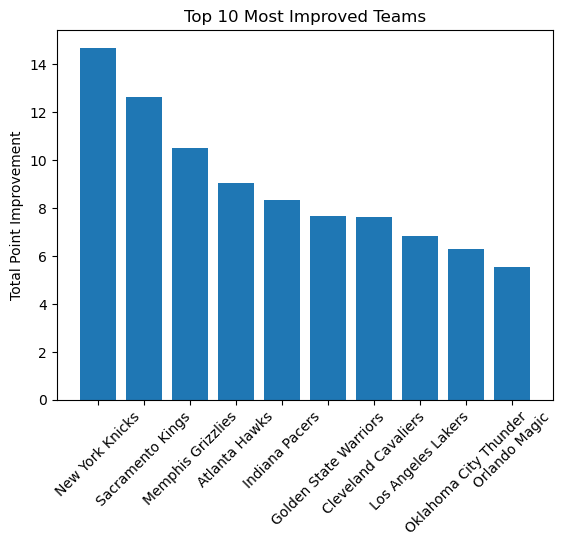

In [83]:
plt.bar(team_improvement['team_name_home'].head(10), 
       team_improvement['total_improvement'].head(10))
plt.title('Top 10 Most Improved Teams')
plt.xticks(rotation=45)
plt.ylabel('Total Point Improvement')
plt.show()

Falling action
- A fascinating pattern emerges when we examine the year-over-year scoring changes.
- Rather than showing gradual improvements, these teams demonstrated significant jumps in specific seasons.
- The New York Knicks and Sacramento Kings, in particular, showed dramatic offensive improvements, suggesting successful strategic shifts.

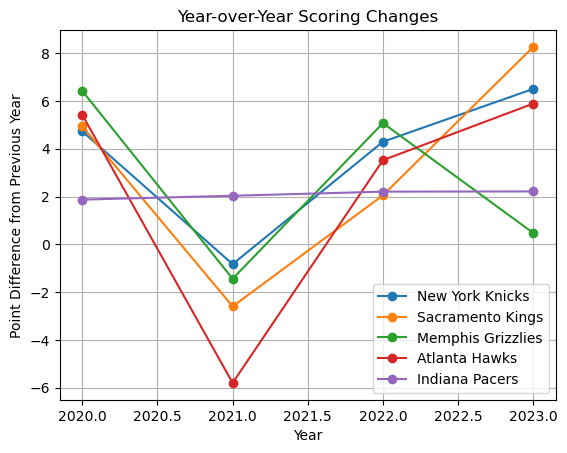

In [88]:
for team in top_5_teams:
    team_data = team_year_avg[team_year_avg['team_name']==team]
    changes = team_data['points'].diff()
    plt.plot(team_data['game_year'][1:], changes[1:], marker='o', label=team)
plt.title('Year-over-Year Scoring Changes')
plt.xlabel('Year')
plt.ylabel('Point Difference from Previous Year')
plt.legend()
plt.grid(True)
plt.show()

Resolution
- For investors, teams like the Knicks and Kings represent particularly interesting, showing both the highest absolute improvement and potential for continued growth. The data indicates these teams are successfully transitioning into more competitive offensive units.
- Despite some variability, teams like the Memphis Grizzlies and Hawks demonstrate sustainable offensive development that could translate to long-term value.

#### 5. Which teams have demonstrated the best defensive metrics (e.g., blocks and steals), and how has this impacted their winning consistency?

Introduction
- Defense often wins championships. We analyzed defensive metrics from 2019-2023 to identify teams with the strongest defensive capabilities.

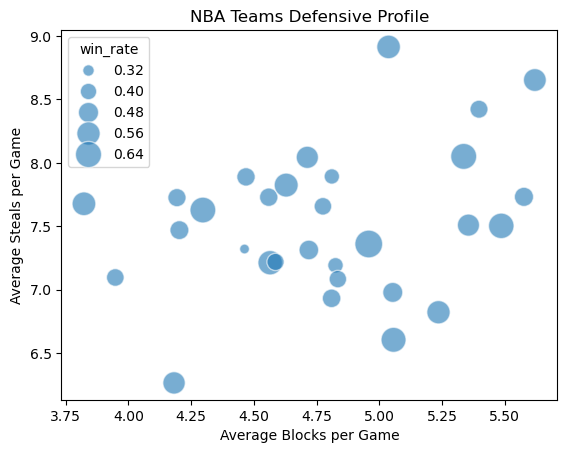

In [90]:
sns.scatterplot(data=defense_analysis, 
                x='avg_blocks', y='avg_steals',
                size='win_rate', sizes=(50, 400),
                alpha=0.6)
plt.title('NBA Teams Defensive Profile')
plt.xlabel('Average Blocks per Game')
plt.ylabel('Average Steals per Game')
plt.show()

In [89]:
# home games stats
home_defense = regular_games[['team_name_home', 'blk_home', 'stl_home', 'wl_home']].rename(
   columns={'team_name_home': 'team_name', 
           'blk_home': 'blocks',
           'stl_home': 'steals',
           'wl_home': 'win_loss'})

# away games stats
away_defense = regular_games[['team_name_away', 'blk_away', 'stl_away', 'wl_away']].rename(
   columns={'team_name_away': 'team_name',
           'blk_away': 'blocks', 
           'stl_away': 'steals',
           'wl_away': 'win_loss'})

# defense metrics
all_defense = pd.concat([home_defense, away_defense])
defense_stats = all_defense.groupby('team_name').agg(
    avg_blocks=('blocks', 'mean'),
    avg_steals=('steals', 'mean')
).reset_index()

# win rate 
wins = all_defense[all_defense['win_loss'] == 'W'].groupby('team_name').size()
total_games = all_defense.groupby('team_name').size()
win_rates = (wins / total_games).reset_index(name='win_rate')

# defense rating
defense_analysis = pd.merge(defense_stats, win_rates, on='team_name')
defense_analysis['defense_rating'] = defense_analysis['avg_blocks'] + defense_analysis['avg_steals']
defense_sorted = defense_analysis.sort_values(
   by=['defense_rating', 'win_rate'], 
   ascending=[False, False]
)

print("Teams with the best defensive metrics and their win consistency:")
print(defense_sorted.head(10))

Teams with the best defensive metrics and their win consistency:
                 team_name  avg_blocks  avg_steals  win_rate  defense_rating
14       Memphis Grizzlies    5.619718    8.653521  0.546479       14.273239
27         Toronto Raptors    5.036932    8.914773  0.568182       13.951705
17  Minnesota Timberwolves    5.397101    8.423188  0.431884       13.820290
22      Philadelphia 76ers    5.336158    8.050847  0.635593       13.387006
11          Indiana Pacers    5.576271    7.731638  0.457627       13.307910
1           Boston Celtics    5.485876    7.502825  0.621469       12.988701
13      Los Angeles Lakers    5.355114    7.508523  0.528409       12.863636
9    Golden State Warriors    4.713043    8.043478  0.530435       12.756522
10         Houston Rockets    4.810734    7.892655  0.381356       12.703390
23            Phoenix Suns    4.628895    7.824363  0.577904       12.453258


Rising Action
- Looking at regular season games, we discovered that teams excel in different aspects of defense.
- The Memphis Grizzlies lead with all three defensive metrics, while the Toronto Raptors show exceptional steal rates.

Climax
- Our analysis reveals interesting patterns in defensive efficiency.
- The top performers show remarkable balance: Memphis Grizzlies average 5.62 blocks and 8.65 steals, while Philadelphia 76ers combine strong defensive metrics with the highest win rate (63.6%) among top defenders.

Text(0.5, 1.0, 'Relationship Between Defensive Performance and Win Rate')

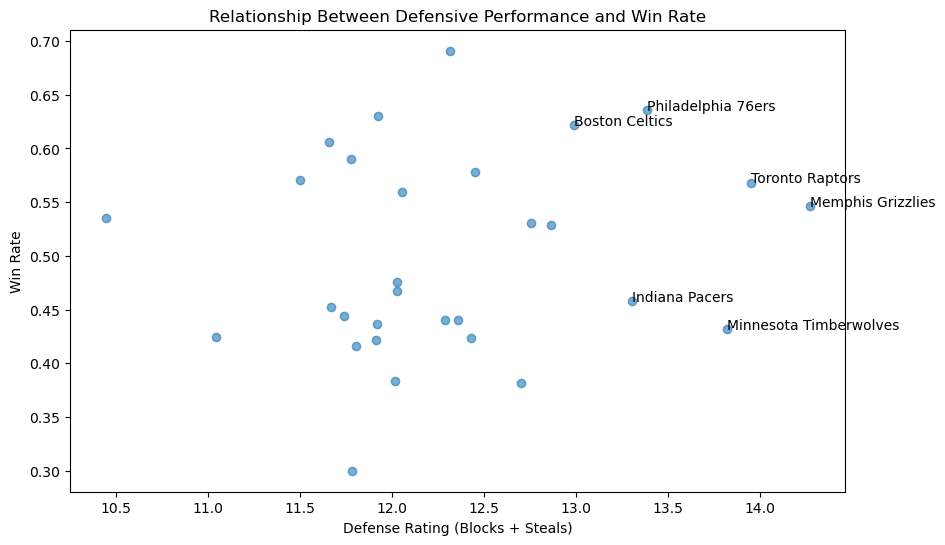

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(defense_sorted['defense_rating'], 
           defense_sorted['win_rate'], 
           alpha=0.6)

for idx, row in defense_sorted.head(6).iterrows():
    plt.annotate(row['team_name'], 
                (row['defense_rating'], row['win_rate']))

plt.xlabel('Defense Rating (Blocks + Steals)')
plt.ylabel('Win Rate')
plt.title('Relationship Between Defensive Performance and Win Rate')

Resolution
- The Philadelphia 76ers and Boston Celtics stand out as particularly attractive opportunities, combining elite defensive metrics with high win rates (over 60%).
- These teams demonstrate that strong defensive fundamentals translate to consistent winning performance, suggesting stable long-term value potential.